In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000


In [3]:
df.shape

(75388, 24)

In [4]:
df.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
df.isnull().any(axis=1).sum()

0

In [6]:
#sorting the values based on oldest member of each house and dropping duplicate SERIAL values 
df = df.sort_values(['SERIAL', 'AGE'], ascending=[True, False])
df=df.drop_duplicates('SERIAL')
df.shape

(30802, 24)

In [7]:
#dropping unnecessary values
df = df.drop(['SERIAL', 'OWNERSHPD', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL','PERNUM', 
              'PERWT','VALUEH', 'BUILTYR2','BIRTHYR','EDUCD'], axis=1)

In [8]:
df.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'MARST', 'EDUC', 'INCTOT'],
      dtype='object')

In [10]:
#replacing MARST AND EDUC values
df['MARST'] = df['MARST'].replace({1:'married,spouse_present', 2:'married,spouse_absent', 3:'separated', 4:'divorced', 5:'widow', 6:'single'})
df['EDUC'] = df['EDUC'].replace({0:'no_school', 1:'Primary_school', 2:'Elementry_school', 3:'Gr9_schooling', 4:'Gr10_schooling', 5:'Gr11_schooling', 6:'Gr12_schooling', 7:'1yr_college', 8:'2yrs_college', 9:'3yrs_college', 10:'4yrs_college', 11:'5+yrscollege'})

In [11]:
#converting MARST and EDUC into dummies
df = pd.get_dummies(df, columns=['MARST','EDUC'])
df.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'INCTOT', 'MARST_divorced',
       'MARST_married,spouse_absent', 'MARST_married,spouse_present',
       'MARST_separated', 'MARST_single', 'MARST_widow', 'EDUC_1yr_college',
       'EDUC_2yrs_college', 'EDUC_4yrs_college', 'EDUC_5+yrscollege',
       'EDUC_Elementry_school', 'EDUC_Gr10_schooling', 'EDUC_Gr11_schooling',
       'EDUC_Gr12_schooling', 'EDUC_Gr9_schooling', 'EDUC_Primary_school',
       'EDUC_no_school'],
      dtype='object')

In [12]:
df.shape

(30802, 27)

In [13]:
# Split data into X and y
X = df.drop('OWNERSHP', axis=1)
y = df['OWNERSHP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the training and testing data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LINEAR 

In [14]:
#model fitting
svm_linear = SVC(kernel='linear',cache_size=1000, verbose = True, max_iter = 100000, random_state=1)

svm_linear.fit(X_train_scaled, y_train)

accuracy = svm_linear.score(X_test_scaled, y_test)
print("SVM Linear Accuracy :", accuracy)

[LibSVM]SVM Linear Accuracy : 0.8278683202389455


In [15]:
#parameter tuning
kfold = skm.KFold(5, random_state=1,shuffle=True)
grid = skm.GridSearchCV(svm_linear,{'C':[0.01,0.1,1,10]},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train_scaled, y_train)
grid.best_params_

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'C': 10}

In [16]:
#model fitting after parameter tuning
svm_linear = SVC(kernel='linear', C = 10, cache_size=1000, verbose = True, max_iter = 100000, random_state=1)

svm_linear.fit(X_train_scaled, y_train)

accuracy = svm_linear.score(X_test_scaled, y_test)
print("SVM Linear Accuracy after parameter tuning:", accuracy)

[LibSVM]SVM Linear Accuracy after parameter tuning: 0.8272839426011298


In [17]:
y_pred = svm_linear.predict(X_test_scaled)
confusion_matrix(y_pred, y_test)

array([[10083,  1854],
       [  806,  2658]], dtype=int64)

In [18]:
#finding the importance features
coefficients = svm_linear.coef_
importance_scores = np.abs(coefficients)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance Score': importance_scores[0]})
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)
importance_df

,Feature,Importance Score
1,HHINCOME,4.477121
3,BEDROOMS,4.199444
5,NFAMS,2.605948
7,AGE,2.300163
2,ROOMS,1.971770
8,INCTOT,1.466320
0,DENSITY,1.109097
12,MARST_separated,0.614624
19,EDUC_Elementry_school,0.542623
11,"MARST_married,spouse_present",0.483426


[LibSVM]

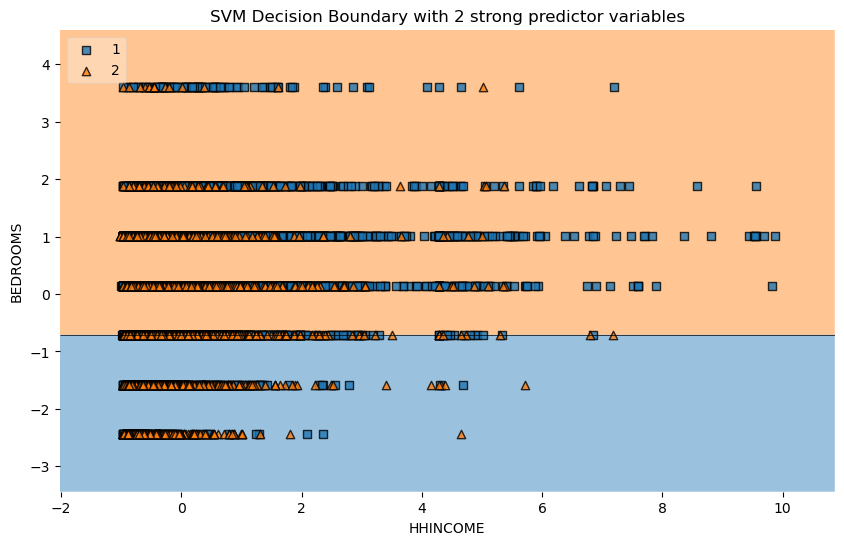

In [19]:
#plotting svm with 2 strong predictors
strong_predictors_2 = importance_df.head(2)['Feature'].values
strong_predictors = X[strong_predictors_2]
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(strong_predictors, y, test_size=0.5, random_state=1)

scaler_strong = StandardScaler()
X_train_scaled_strong = scaler_strong.fit_transform(X_train_strong)
X_test_scaled_strong = scaler_strong.transform(X_test_strong)

svm_linear_strong = SVC(kernel='linear', C=10, cache_size=1000, verbose=True, max_iter=100000, random_state=1)
svm_linear_strong.fit(X_train_scaled_strong, y_train_strong)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_scaled_strong, y_test_strong.to_numpy(), clf=svm_linear_strong, legend=2)
plt.xlabel(strong_predictors_2[0])
plt.ylabel(strong_predictors_2[1])
plt.title('SVM Decision Boundary with 2 strong predictor variables')
plt.show()

# RADIAL

In [33]:
#fitting the data with radial kernel
svm_radial = SVC(kernel='rbf', cache_size=1000, verbose = True, max_iter = 100000, random_state=1)

svm_radial.fit(X_train_scaled, y_train)

accuracy = svm_radial.score(X_test_scaled, y_test)
print("SVM Radial kernel accuracy :", accuracy)

[LibSVM]SVM Radial kernel accuracy : 0.8285176287254075


In [34]:
#parameter tuning
kfold = skm.KFold(5, random_state=1,shuffle=True)
grid = skm.GridSearchCV(svm_radial,{'C':[0.01,0.1,1,10], 'gamma':[0.5,1,2]},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train_scaled, y_train)
grid.best_params_

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'C': 10, 'gamma': 0.5}

In [35]:
#fitting the model after parameter tuning
svm_radial = SVC(kernel='rbf', C=10, gamma=0.5, cache_size=1000, verbose = True, max_iter = 100000, random_state=1)

svm_radial.fit(X_train_scaled, y_train)

accuracy = svm_radial.score(X_test_scaled, y_test)
print("SVM Radial accuracy after tuning :", accuracy)

[LibSVM]SVM Radial accuracy after tuning : 0.8318940328550094


In [36]:
y_pred = svm_radial.predict(X_test_scaled)
confusion_matrix(y_pred, y_test)

array([[10271,  1971],
       [  618,  2541]], dtype=int64)

In [37]:
#important features
result = permutation_importance(svm_radial, X_test_scaled, y_test, n_repeats=5, random_state=1)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
importance_df

,feature,importance
0,BEDROOMS,0.055165
1,AGE,0.040361
2,ROOMS,0.017674
3,VEHICLES,0.013181
4,INCTOT,0.007337
5,MARST_single,0.005740
6,DENSITY,0.005493
7,MARST_separated,0.004753
8,EDUC_Gr12_schooling,0.004480
9,MARST_divorced,0.003961


[LibSVM]

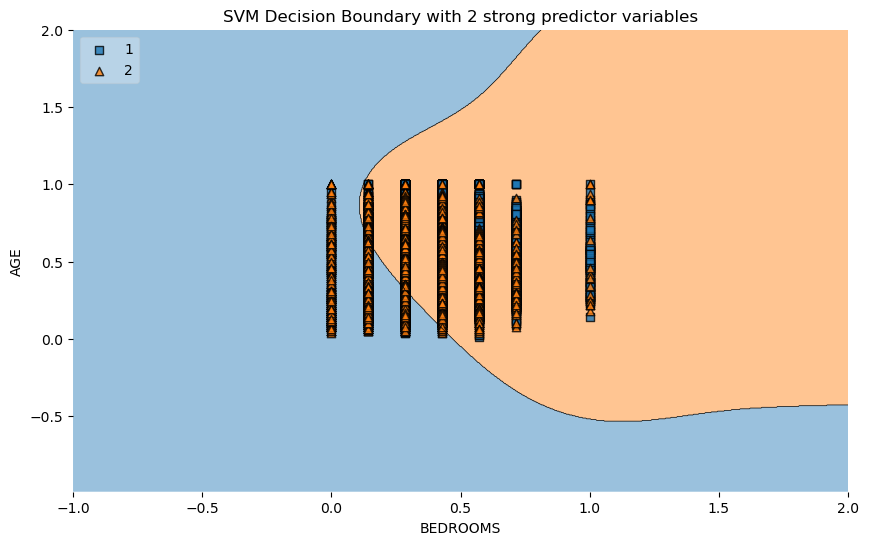

In [38]:
strong_predictors_2 = importance_df.head(2)['feature'].values
strong_predictors = X[strong_predictors_2]
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(strong_predictors, y, test_size=0.5, random_state=1)

scaler_strong = MinMaxScaler()
X_train_scaled_strong = scaler_strong.fit_transform(X_train_strong)
X_test_scaled_strong = scaler_strong.transform(X_test_strong)


svm_radial_strong = SVC(kernel='rbf', C=10, gamma=0.5, cache_size=1000, verbose = True, max_iter = 100000, random_state=1)
svm_radial_strong.fit(X_train_scaled_strong, y_train_strong)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_scaled_strong, y_test_strong.to_numpy(), clf=svm_radial_strong, legend=2)
plt.xlabel(strong_predictors_2[0])
plt.ylabel(strong_predictors_2[1])
plt.title('SVM Decision Boundary with 2 strong predictor variables')
plt.show()

# POLYNOMIAL

In [26]:
#polynomial kernel model fitting
svm_polynomial = SVC(kernel='poly', cache_size=1000, verbose = True, max_iter = 1000000, random_state=1)
svm_polynomial.fit(X_train_scaled, y_train)
accuracy = svm_polynomial.score(X_test_scaled, y_test)
print("SVM Polynomial kernel accuracy :", accuracy)

[LibSVM]SVM Polynomial kernel accuracy : 0.8255308096876827


In [27]:
#parameter tuning
kfold = skm.KFold(5, random_state=1,shuffle=True)
grid = skm.GridSearchCV(svm_polynomial,{'C':[0.01,0.1,1,5], 'degree':[1,2,3]},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train_scaled, y_train)
grid.best_params_

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

{'C': 5, 'degree': 2}

In [28]:
#model fitting after parameter tuning
svm_polynomial = SVC(kernel='poly', degree=2, coef0=1, C=5, gamma='scale', cache_size=1000, verbose = True, max_iter = 1000000, random_state=1)
svm_polynomial.fit(X_train_scaled, y_train)
accuracy = svm_polynomial.score(X_test_scaled, y_test)
print("SVM Polynomial kernel accuracy after tuning :", accuracy)

[LibSVM]SVM Polynomial kernel accuracy after tuning : 0.830400623336147


In [29]:
y_pred = svm_polynomial.predict(X_test_scaled)
confusion_matrix(y_pred, y_test)

array([[10261,  1984],
       [  628,  2528]], dtype=int64)

In [30]:
result = permutation_importance(svm_polynomial, X_test_scaled, y_test, n_repeats=5, random_state=1)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
importance_df

,feature,importance
0,BEDROOMS,5.939874e-02
1,AGE,3.960782e-02
2,"MARST_married,spouse_present",2.376469e-02
3,ROOMS,1.372638e-02
4,EDUC_4yrs_college,9.012402e-03
5,VEHICLES,6.506071e-03
6,INCTOT,5.545094e-03
7,EDUC_5+yrscollege,5.363288e-03
8,HHINCOME,3.155639e-03
9,DENSITY,2.817999e-03


[LibSVM]

C:\Users\KARRA VIVEK REDDY\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


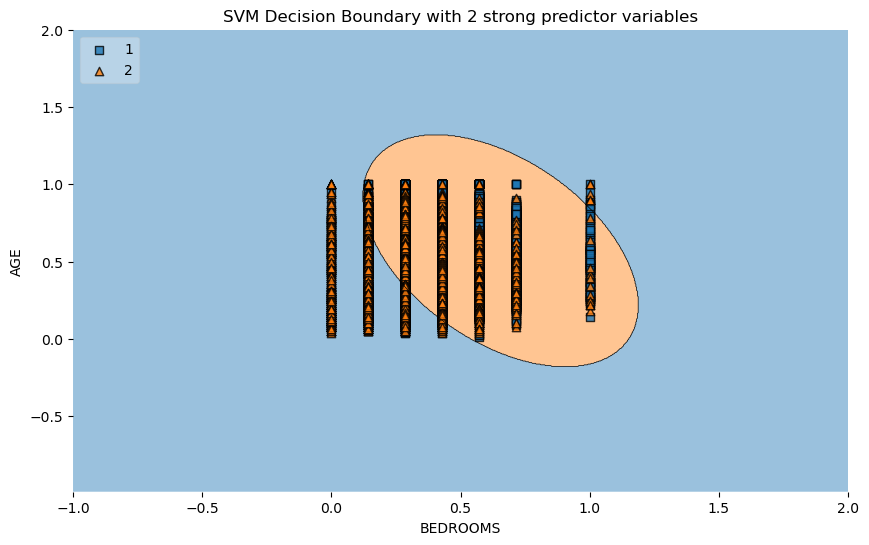

In [32]:
strong_predictors_2 = importance_df.head(2)['feature'].values
strong_predictors = X[strong_predictors_2]
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(strong_predictors, y, test_size=0.5, random_state=1)

scaler_strong = MinMaxScaler()
X_train_scaled_strong = scaler_strong.fit_transform(X_train_strong)
X_test_scaled_strong = scaler_strong.transform(X_test_strong)

# Train the best model with the top 2 predictor variables
svm_polynomial_strong = SVC(kernel='poly', degree=2, coef0=1, C=5, gamma='scale', cache_size=1000, verbose = True, max_iter = 1000000, random_state=1)
svm_polynomial_strong.fit(X_train_scaled_strong, y_train_strong)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_scaled_strong, y_test_strong.to_numpy(), clf=svm_polynomial_strong, legend=2)
plt.xlabel(strong_predictors_2[0])
plt.ylabel(strong_predictors_2[1])
plt.title('SVM Decision Boundary with 2 strong predictor variables')
plt.show()